In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
#get the data
df = pd.read_pickle("accidents.pkl")

#drop non-alcohol drug use (p11 == 4 & p11 == 5)
#df = df[df["p11"] != 4 and df["p11"] != 5]
df = df[df["p11"] != 4]
df = df[df["p11"] != 5]

#drop all na from p49(hydroplane)
df = df[df["p49"] != -1]

#get relevant data (alcohol use and accident seriousness)
df["alcohol_use"] = df.apply(lambda row : row['p11'] >= 7, axis=1)
df["accident_seriousness"] = df.apply(lambda row : (row['p13a']+row['p13b']) > 0, axis=1)
df["wet_surface"] = df.apply(lambda row : row['p16'] == 3 or row['p16'] >= 6, axis=1)
df["hydroplane"] = df.apply(lambda row : 0 if row['p49'] == 0 else (1 if row["wet_surface"] else 2), axis=1)

Plot alcohol use and accident seriousness

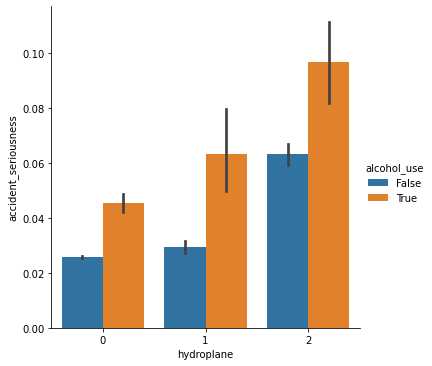

In [17]:
sns.catplot(x='hydroplane', y='accident_seriousness', hue='alcohol_use', data=df, kind="bar")

Sober drivers have more serious accidents on wet surfaces

In [10]:
df_wet = df[df["wet_surface"]]

#compute contingency table
cross = pd.crosstab(index=df["alcohol_use"], columns=df["accident_seriousness"])

p=2.4037278369412052e-74
Dependent


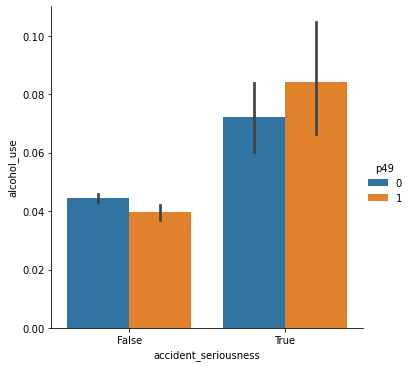

In [11]:
sns.catplot(x="accident_seriousness", y="alcohol_use", hue='p49', data=df_wet, kind="bar")

alpha = 0.05

stat, p, dof, expected = chi2_contingency(cross)
print(f"{p=}")

if p <= alpha:
    print('Dependent')
else:
    print('Independent')